## Binarization
In simple terms, binarization is to convert a picture into only black and white images. This is mainly to distinguish the part that you want to recognize from the background. In this method, we need to find a threshold. If the pixel value is greater than this threshold, convert it to a white pixel (value = 255), and if it is less than the threshold, convert it to a black pixel (value = 0). For example, to identify a QR code, two-dimensional The code is composed of two types of information, 1,0. We need this method to determine which part is black and which part is white.

### Global thresholding
This part is the simplest thresholding method. It traverses all pixels and then re-assigns them according to the set threshold value. Here the value of the threshold is 127 because it is exactly half of the pixel range 0-255

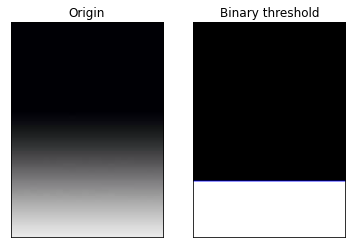

In [50]:
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('image/1.jpg')
ret,thresh = cv.threshold(img,127,255,cv.THRESH_BINARY)

titles = ['Origin','Binary threshold']
images = [img,thresh]

for i in range(2):
    plt.subplot(1,2,i+1)
    plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

### Otsu's Binarization

In global thresholding, we generally choose 127 as the threshold value, but we don't know whether this effect is good or not, so if we want to find an ideal value, we can only experiment one by one, but this will consume a lot of time and energy. Here, we use the otsu algorithm to determine the threshold, an adaptive threshold determination method. The basic principle is to find the lowest of the two peaks in the bimodal image as the threshold.

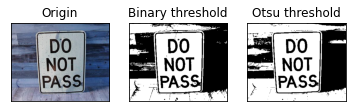

In [92]:
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('image/2.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

ret,thresh = cv.threshold(gray,127,255,cv.THRESH_BINARY)

ret1,thresh1 = cv.threshold(gray,0,255,cv.THRESH_OTSU)

titles = ['Origin','Binary threshold','Otsu threshold']
images = [img,thresh,thresh1]

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

Text(0.5, 1.0, 'Histogram')

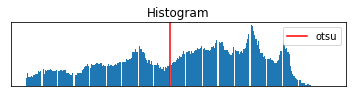

In [93]:
plt.subplot(312)
plt.hist(gray.ravel(),256)
plt.axvline(x=ret1,color='red',label='otsu')
plt.legend(loc='upper right')
plt.xticks([]), plt.yticks([])
plt.title('Histogram')

### Adaptive Thresholding

The above two methods are global threshold methods, so they do not apply to some images with uneven lightings, such as processing images through Otsu. The processed image is not the result we want. In this case, we need an adaptive threshold. This method is not to calculate the global threshold but divide a picture into different areas by brightness.In each region separately, Calculate its threshold. There are also many ways to determine the local threshold, generally calculating the mean or Gaussian weighted average.

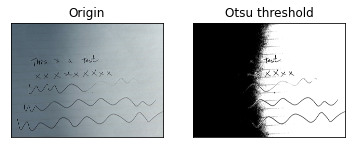

In [109]:
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('image/3.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#otsu
ret,thresh12 = cv.threshold(gray,0,255,cv.THRESH_OTSU)
#adaptive mean
th2 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
#adaptive gaussian
th3 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)

titles = ['Origin','Otsu threshold']
images = [img,thresh]

for i in range(2):
    plt.subplot(1,2,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])


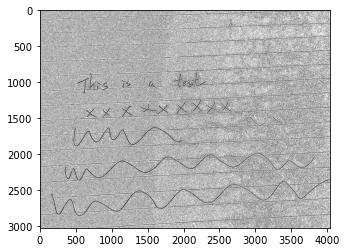

In [110]:
plt.imshow(th2,'gray')